In [8]:
import pandas as pd
import main
import geopandas as gpd
from shapely.geometry import LineString
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.cm as cm
import numpy as np


In [3]:
df = pd.read_csv('/Users/willponczak/Desktop/QC2025/data/grouped-months/all_months_1day.csv', sep=',')

In [ ]:
#################
# Before Algorithm
#################

In [4]:
df['shipid'].nunique()

6832

In [15]:
df.head()

,shipid,date_time_utc,flagname,iceclass,astd_cat,sizegroup_gt,fuelquality,fuelcons,co,co2,...,blackwater,greywater,garbage,dist_nextpoint,sec_nextpoint,longitude,latitude,year,month,day
0,146,2019-01-31 20:44:10,Iceland,FS Ice Class 1C,Fishing vessels,< 1000 GT,0,0.000075,5.533000e-07,0.000237,...,0.000025,0.000188,0.0,0.185819,22,-23.703434,64.89592,2019,1,31
1,146,2019-01-31 18:10:41,Iceland,FS Ice Class 1C,Fishing vessels,< 1000 GT,0,0.001715,1.269340e-05,0.005438,...,0.000175,0.001293,0.0,609.050840,151,-23.737206,64.91904,2019,1,31
2,146,2019-01-31 18:58:51,Iceland,FS Ice Class 1C,Fishing vessels,< 1000 GT,0,0.000238,1.760600e-06,0.000754,...,0.000081,0.000600,0.0,1.126033,70,-23.703379,64.89596,2019,1,31
3,146,2019-01-31 17:55:12,Iceland,FS Ice Class 1C,Fishing vessels,< 1000 GT,0,0.002048,1.515790e-05,0.006493,...,0.000233,0.001722,0.0,768.925600,201,-23.800817,64.93644,2019,1,31
4,146,2019-01-31 19:20:03,Iceland,FS Ice Class 1C,Fishing vessels,< 1000 GT,0,0.000880,6.514300e-06,0.002791,...,0.000300,0.002218,0.0,0.379927,259,-23.703413,64.89597,2019,1,31


/var/folders/9d/bphw52wd7fngbyw4fdd0280h0000gp/T/ipykernel_73516/667035313.py:22: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


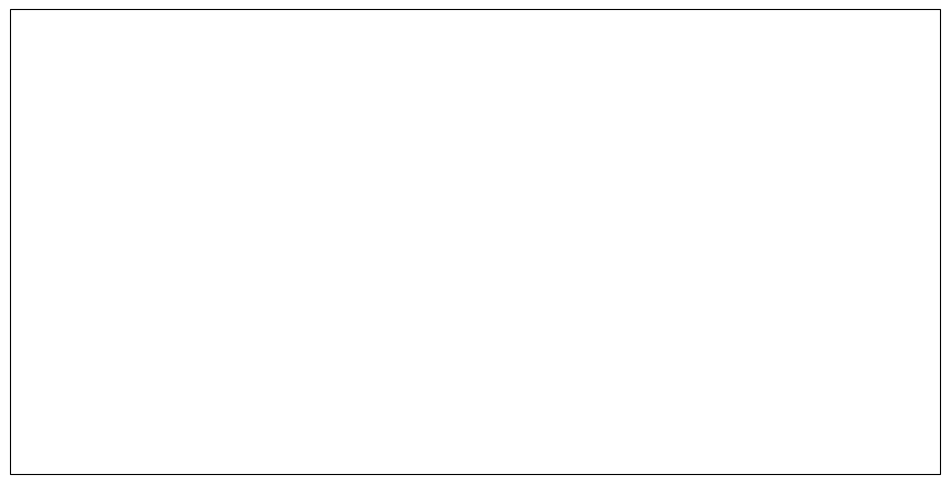

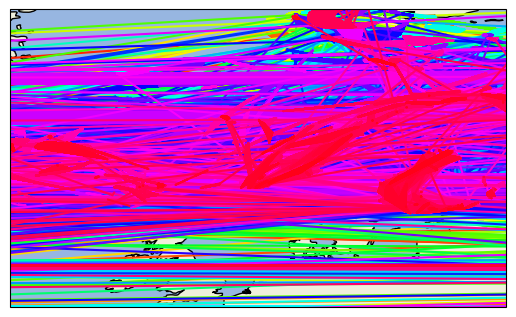

In [10]:
fig, ax = plt.subplots(1, 1, figsize=(12, 8), subplot_kw={'projection': ccrs.PlateCarree()})

fig, ax = plt.subplots(1, 1, subplot_kw={'projection': ccrs.PlateCarree()})

# Get unique ships and assign colors
unique_ships = df['shipid'].unique()
colors = cm.hsv(np.linspace(0, 1, len(unique_ships)))

# Plot each ship with a different color
for i, ship_id in enumerate(unique_ships):
    ship_data = df[df['shipid'] == ship_id]
    ax.plot(ship_data['longitude'], ship_data['latitude'], color=colors[i])

ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.LAKES)
ax.add_feature(cfeature.OCEAN)
ax.add_feature(cfeature.LAND)

ax.set_xlim(-20, 30)
ax.set_ylim(50, 80)

fig.show()

In [26]:
df_one_shipid = df
df_one_shipid = df_one_shipid[(df_one_shipid['shipid'] == '146')]

IndexError: index 0 is out of bounds for axis 0 with size 0

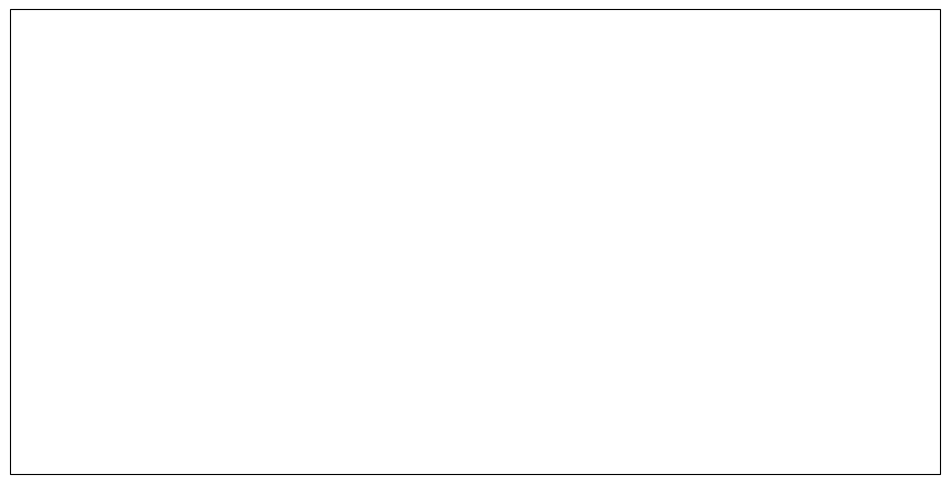

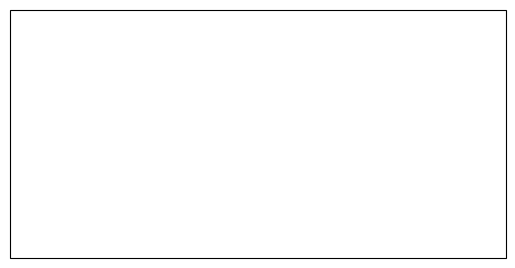

In [28]:
fig, ax = plt.subplots(1, 1, figsize=(12, 8), subplot_kw={'projection': ccrs.PlateCarree()})

fig, ax = plt.subplots(1, 1, subplot_kw={'projection': ccrs.PlateCarree()})

# Get unique ships and assign colors
unique_ships = df_one_shipid['shipid'].unique()
colors = cm.hsv(np.linspace(0, 1, len(unique_ships)))

# Plot each ship with a different color
#for i, ship_id in enumerate(unique_ships):
ship_data = df_one_shipid[df_one_shipid['shipid'] == '146']
ax.plot(ship_data['longitude'], ship_data['latitude'], color=colors[0])

ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.LAKES)
ax.add_feature(cfeature.OCEAN)
ax.add_feature(cfeature.LAND)

ax.set_xlim(-20, 30)
ax.set_ylim(50, 80)

fig.show()

In [ ]:
##################
# After Algorithm
##################

In [11]:
df_after_alg = main.build_track_table(df)

Processing 2776664 records
Data sample after cleaning:
  Date range: 2019-01-31 00:00:00 to 2019-12-01 23:59:57
  Ship types: ['fishing vessels' 'passenger ships' 'general cargo ships'
 'other activities' 'ro-ro cargo ships' 'offshore supply ships'
 'crude oil tankers' 'bulk carriers' 'refrigerated cargo ships'
 'oil product tankers' 'other service offshore vessels' 'chemical tankers'
 'cruise ships' 'container ships' 'gas tankers']
  Unique ships: 6832
Creating segments for 6832 unique shipids
Created 6832 segments
Sample segment: fishing vessels|iceland|fs ice class 1c|< 1000 gt
Found 6832 segments across 12 time periods
Created 5296 tracks


In [14]:
df_after_alg.head()

,month,segment_id,track_id
0,2019-01,7541,track_001
1,2019-01,8353,track_002
2,2019-02,11382,track_002
3,2019-01,1642,track_003
4,2019-02,1511,track_003


In [18]:
result = pd.merge(df_after_alg, df, left_on='segment_id', right_on='shipid', how='inner')

In [20]:
result.head()

,month_x,segment_id,track_id,shipid,date_time_utc,flagname,iceclass,astd_cat,sizegroup_gt,fuelquality,...,blackwater,greywater,garbage,dist_nextpoint,sec_nextpoint,longitude,latitude,year,month_y,day
0,2019-01,7541,track_001,7541,2019-01-31 00:30:21,Bahamas,FS Ice Class 1B,Refrigerated cargo ships,1000 - 4999 GT,3,...,0.001174,0.008691,0.0,2234.9832,369,7.307430,63.767130,2019,1,31
1,2019-01,7541,track_001,7541,2019-01-31 03:46:38,Bahamas,FS Ice Class 1B,Refrigerated cargo ships,1000 - 4999 GT,3,...,0.001149,0.008503,0.0,2149.6070,361,6.456170,63.216120,2019,1,31
2,2019-01,7541,track_001,7541,2019-01-31 09:28:30,Bahamas,FS Ice Class 1B,Refrigerated cargo ships,1000 - 4999 GT,3,...,0.001178,0.008715,0.0,2458.9458,370,4.989175,62.243393,2019,1,31
3,2019-01,7541,track_001,7541,2019-01-31 01:26:10,Bahamas,FS Ice Class 1B,Refrigerated cargo ships,1000 - 4999 GT,3,...,0.001149,0.008503,0.0,2343.6943,361,7.067465,63.615368,2019,1,31
4,2019-01,7541,track_001,7541,2019-01-31 05:24:20,Bahamas,FS Ice Class 1B,Refrigerated cargo ships,1000 - 4999 GT,3,...,0.001178,0.008715,0.0,2332.2874,370,6.046176,62.953190,2019,1,31


In [22]:
df_one_track = result
df_one_track = df_one_track[(df_one_track['track_id'] == 'track_001')]

In [23]:
df_one_track.shape

(107, 32)

/var/folders/9d/bphw52wd7fngbyw4fdd0280h0000gp/T/ipykernel_73516/620732571.py:20: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


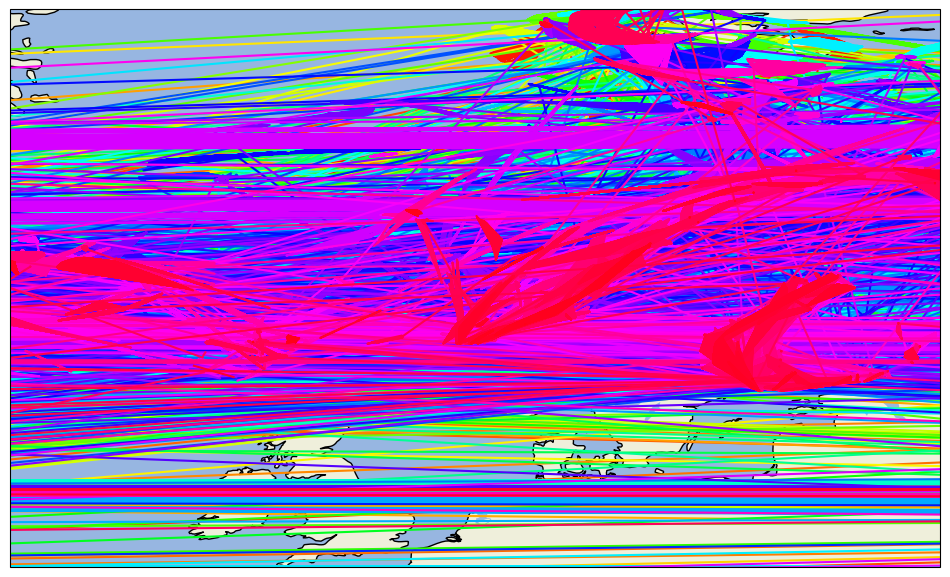

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(12, 8), subplot_kw={'projection': ccrs.PlateCarree()})

# Get unique tracks and assign colors
unique_tracks = df_one_track['track_id'].unique()
colors = cm.hsv(np.linspace(0, 1, len(unique_tracks)))

# Plot each track with a different color
#for i, track_id in enumerate(unique_tracks):
track_data = df_one_track[df_one_track['track_id'] == 'track_001']
ax.plot(track_data['longitude'], track_data['latitude'], color=colors[i])

ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.LAKES)
ax.add_feature(cfeature.OCEAN)
ax.add_feature(cfeature.LAND)

ax.set_xlim(-20, 30)
ax.set_ylim(50, 80)

fig.show()

/var/folders/9d/bphw52wd7fngbyw4fdd0280h0000gp/T/ipykernel_73516/3891904814.py:20: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


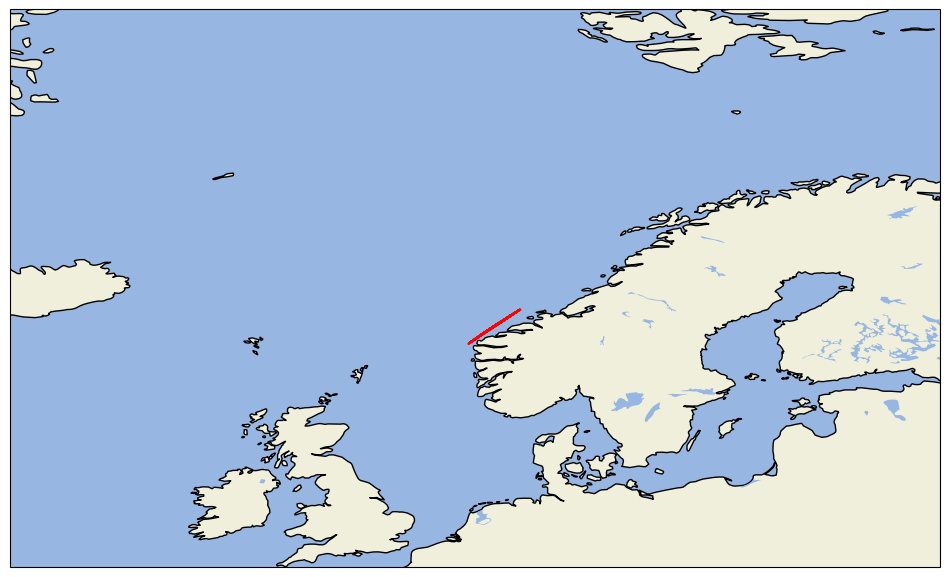

In [25]:
fig, ax = plt.subplots(1, 1, figsize=(12, 8), subplot_kw={'projection': ccrs.PlateCarree()})

# Get unique tracks and assign colors
unique_tracks = df_one_track['track_id'].unique()
colors = cm.hsv(np.linspace(0, 1, len(unique_tracks)))

# Plot each track with a different color
#for i, track_id in enumerate(unique_tracks):
track_data = df_one_track[df_one_track['track_id'] == 'track_001']
ax.plot(track_data['longitude'], track_data['latitude'], color=colors[0])

ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.LAKES)
ax.add_feature(cfeature.OCEAN)
ax.add_feature(cfeature.LAND)

ax.set_xlim(-20, 30)
ax.set_ylim(50, 80)

fig.show()

In [5]:
df.columns

Index(['shipid', 'date_time_utc', 'flagname', 'iceclass', 'astd_cat',
       'sizegroup_gt', 'fuelquality', 'fuelcons', 'co', 'co2', 'so2', 'pm',
       'nox', 'n2o', 'nmvoc', 'ch4', 'blackcarbon', 'organiccarbon',
       'oilbilgewater', 'blackwater', 'greywater', 'garbage', 'dist_nextpoint',
       'sec_nextpoint', 'longitude', 'latitude', 'year', 'month', 'day'],
      dtype='object')

In [25]:
df.shipid.value_counts()[500]

4589

In [28]:
df_s = df[df.shipid == 4589].dropna()

In [7]:
track_table = main.build_track_table(df)

Missing column: lat


In [15]:
track_table

,month,segment_id,track_id


In [8]:
df_big_with_tracks = df.merge(track_table, left_on='shipid', right_on='segment_id', how='left')


In [31]:
import cartopy

In [32]:
import matplotlib.pyplot as plt

In [42]:
import geopandas as gpd

In [48]:
gdf_s = gpd.GeoDataFrame(data=df_s, geometry=gpd.points_from_xy(x=df_s.longitude, y=df_s.latitude), crs=cartopy.crs.PlateCarree())

In [49]:
from shapely.geometry import LineString

gdf_s = gdf_s.sort_values(by=['shipid', 'date_time_utc'])


In [50]:

lines = (
    gdf_s.groupby('shipid')['geometry']
    .apply(lambda x: LineString(x.tolist()))
    .reset_index()
)


In [54]:

# Convert to a GeoDataFrame
lines_gdf = gpd.GeoDataFrame(lines, geometry='geometry', crs=gdf_s.crs)


In [56]:
lines_gdf

,shipid,geometry
0,4589,"LINESTRING (4.198 62.004, 4.231 62.021, 4.265 ..."


In [ ]:
df_s.longitude.min(), df_s.longitude.max()


(4.197778, 13.067311)

/var/folders/9d/bphw52wd7fngbyw4fdd0280h0000gp/T/ipykernel_47623/843529459.py:16: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


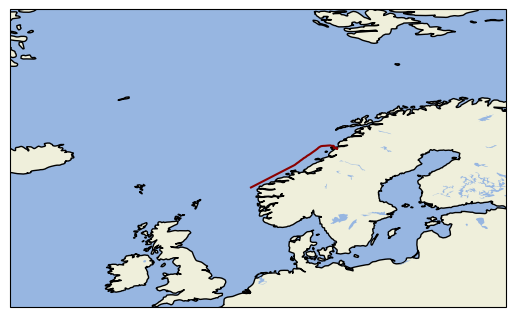

In [66]:
fig, ax = plt.subplots(1, 1, subplot_kw={'projection': cartopy.crs.PlateCarree()})

# ax.plot(df_s['longitude'], df_s['latitude'])
# gdf_s.plot(ax=ax)
lines_gdf.plot(ax=ax, color='darkred')

ax.add_feature(cartopy.feature.COASTLINE)
ax.add_feature(cartopy.feature.LAKES)
ax.add_feature(cartopy.feature.OCEAN)
ax.add_feature(cartopy.feature.LAND)


ax.set_xlim(-20, 30)
ax.set_ylim(50, 80)

fig.show()

In [1]:
# # Sort to ensure LineStrings are in time order
# df_big_with_tracks = df_big_with_tracks.sort_values(by=['track_id', 'date_time_utc'])

# # Create LineStrings per track
# lines = (
#     df_big_with_tracks.groupby('track_id')
#     .apply(lambda x: LineString(zip(x['longitude'].values, x['latitude'].values)), include_groups=False)
#     .reset_index()
# )

# # Rename the geometry column
# lines.columns = ['track_id', 'geometry']

# # Convert to GeoDataFrame
# gdf_tracks = gpd.GeoDataFrame(lines, geometry='geometry')
# gdf_tracks.set_crs(epsg=4326, inplace=True)

# # Plot
# gdf_tracks.plot(figsize=(12, 8), linewidth=1, color='blue')
# plt.title("Ship Tracks")
# plt.xlabel("Longitude")
# plt.ylabel("Latitude")
# plt.show()

In [ ]:
#################
# Before Algorithm
#################

In [30]:
df_after_alg[df_after_alg.track_id == 'track_002']

,month,segment_id,track_id
1,2019-01,8353,track_002
2,2019-02,11382,track_002


In [35]:
lookup_table = df_after_alg
df_jan = pd.read_csv('/Users/willponczak/Desktop/QC2025/data/astd/complete_data/2019/ASTD_area_level3_201901.csv', sep=';')
df_feb = pd.read_csv('/Users/willponczak/Desktop/QC2025/data/astd/complete_data/2019/ASTD_area_level3_201902.csv', sep=';')


KeyboardInterrupt: 

In [37]:
lookup_table['track_id'].unique()

array(['track_001', 'track_002', 'track_003', ..., 'track_5294',
       'track_5295', 'track_5296'], dtype=object)

In [41]:
track_id = 'track_003'

In [50]:
segments_id = lookup_table.loc[lookup_table['track_id'] == track_id].set_index('month')

,shipid,date_time_utc,flagname,iceclass,astd_cat,sizegroup_gt,fuelquality,fuelcons,co,co2,...,blackcarbon,organiccarbon,oilbilgewater,blackwater,greywater,garbage,dist_nextpoint,sec_nextpoint,longitude,latitude
269635,1642,2019-01-22 21:21:29,Iceland,FS Ice Class 1C,Fishing vessels,< 1000 GT,0,0.001534,0.000011,0.004864,...,2.762000e-07,9.328000e-07,3.600000e-09,0.000664,0.002183,0.0,134.337510,205,-23.917988,64.361190
269636,1642,2019-01-22 17:48:39,Iceland,FS Ice Class 1C,Fishing vessels,< 1000 GT,0,0.001576,0.000012,0.004995,...,2.836000e-07,9.580000e-07,3.700000e-09,0.000684,0.002247,0.0,119.742546,211,-23.894562,64.268320
269637,1642,2019-01-22 10:05:20,Iceland,FS Ice Class 1C,Fishing vessels,< 1000 GT,0,0.002259,0.000017,0.007160,...,4.065000e-07,1.373200e-06,5.300000e-09,0.000966,0.003173,0.0,281.483280,298,-24.037764,64.355606
269638,1642,2019-01-22 09:45:49,Iceland,FS Ice Class 1C,Fishing vessels,< 1000 GT,0,0.000608,0.000004,0.001926,...,1.094000e-07,3.693000e-07,1.400000e-09,0.000259,0.000852,0.0,78.090096,80,-24.060272,64.354706
269639,1642,2019-01-22 18:40:50,Iceland,FS Ice Class 1C,Fishing vessels,< 1000 GT,0,0.001059,0.000008,0.003356,...,1.906000e-07,6.437000e-07,2.500000e-09,0.000454,0.001491,0.0,126.745834,140,-23.929777,64.287030
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17898826,1642,2019-01-21 05:02:29,Iceland,FS Ice Class 1C,Fishing vessels,< 1000 GT,0,0.006375,0.000047,0.020209,...,1.147600e-06,3.876200e-06,6.700000e-09,0.001231,0.004046,0.0,1447.355800,380,-24.095776,64.373350
17898827,1642,2019-01-21 19:11:08,Iceland,FS Ice Class 1C,Fishing vessels,< 1000 GT,0,0.001215,0.000009,0.003852,...,2.187000e-07,7.388000e-07,2.800000e-09,0.000519,0.001704,0.0,156.388460,160,-23.867233,64.314980
17898828,1642,2019-01-21 16:35:38,Iceland,FS Ice Class 1C,Fishing vessels,< 1000 GT,0,0.002738,0.000020,0.008679,...,4.928000e-07,1.664700e-06,6.400000e-09,0.001167,0.003833,0.0,359.906520,360,-23.757530,64.335610
17898829,1642,2019-01-21 23:38:29,Iceland,FS Ice Class 1C,Fishing vessels,< 1000 GT,0,0.001126,0.000008,0.003568,...,2.027000e-07,6.843000e-07,2.600000e-09,0.000483,0.001587,0.0,131.981930,149,-23.935781,64.329926


1642

In [55]:
df.columns

Index(['shipid', 'date_time_utc', 'flagname', 'iceclass', 'astd_cat',
       'sizegroup_gt', 'fuelquality', 'fuelcons', 'co', 'co2', 'so2', 'pm',
       'nox', 'n2o', 'nmvoc', 'ch4', 'blackcarbon', 'organiccarbon',
       'oilbilgewater', 'blackwater', 'greywater', 'garbage', 'dist_nextpoint',
       'sec_nextpoint', 'longitude', 'latitude', 'year', 'month', 'day'],
      dtype='object')

In [64]:
df['longitude'].mean(), df['latitude'].mean()

(-23.117770591068663, 64.1431708590089)

In [103]:
df

,shipid,date_time_utc,flagname,iceclass,astd_cat,sizegroup_gt,fuelquality,fuelcons,co,co2,...,blackcarbon,organiccarbon,oilbilgewater,blackwater,greywater,garbage,dist_nextpoint,sec_nextpoint,longitude,latitude
11975302,1511,2019-02-01 00:01:49,Iceland,FS Ice Class 1C,Fishing vessels,< 1000 GT,0,0.000218,0.000002,0.000690,...,3.920000e-08,1.323000e-07,5.000000e-10,0.000094,0.000309,0.0,21.407642,29,-24.424988,65.006690
11974931,1511,2019-02-01 00:02:19,Iceland,FS Ice Class 1C,Fishing vessels,< 1000 GT,0,0.002591,0.000019,0.008214,...,4.664000e-07,1.575300e-06,6.000000e-09,0.001102,0.003620,0.0,349.777740,340,-24.425385,65.006600
11975208,1511,2019-02-01 00:07:59,Iceland,FS Ice Class 1C,Fishing vessels,< 1000 GT,0,0.000229,0.000002,0.000726,...,4.130000e-08,1.393000e-07,5.000000e-10,0.000097,0.000319,0.0,31.839159,30,-24.432045,65.005220
11975036,1511,2019-02-01 00:08:28,Iceland,FS Ice Class 1C,Fishing vessels,< 1000 GT,0,0.002745,0.000020,0.008703,...,4.942000e-07,1.669100e-06,6.400000e-09,0.001167,0.003833,0.0,373.700600,360,-24.432650,65.005090
11975216,1511,2019-02-01 00:14:29,Iceland,FS Ice Class 1C,Fishing vessels,< 1000 GT,0,0.002531,0.000019,0.008023,...,4.556000e-07,1.538800e-06,5.900000e-09,0.001076,0.003535,0.0,343.282960,332,-24.439900,65.003740
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11375637,1511,2019-02-28 23:43:06,Iceland,FS Ice Class 1C,Fishing vessels,< 1000 GT,0,0.001087,0.000008,0.003445,...,1.956000e-07,6.608000e-07,2.500000e-09,0.000463,0.001523,0.0,141.321800,143,-22.513195,63.535465
11375471,1511,2019-02-28 23:45:29,Iceland,FS Ice Class 1C,Fishing vessels,< 1000 GT,0,0.001668,0.000012,0.005287,...,3.002000e-07,1.014000e-06,3.900000e-09,0.000716,0.002353,0.0,191.241700,221,-22.513315,63.536730
11375488,1511,2019-02-28 23:49:10,Iceland,FS Ice Class 1C,Fishing vessels,< 1000 GT,0,0.001441,0.000011,0.004567,...,2.593000e-07,8.759000e-07,3.400000e-09,0.000619,0.002034,0.0,163.272810,191,-22.511816,63.538315
11375261,1511,2019-02-28 23:52:21,Iceland,FS Ice Class 1C,Fishing vessels,< 1000 GT,0,0.001349,0.000010,0.004277,...,2.428000e-07,8.202000e-07,3.200000e-09,0.000580,0.001906,0.0,150.531600,179,-22.511553,63.539772


/var/folders/9d/bphw52wd7fngbyw4fdd0280h0000gp/T/ipykernel_73516/616691075.py:23: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


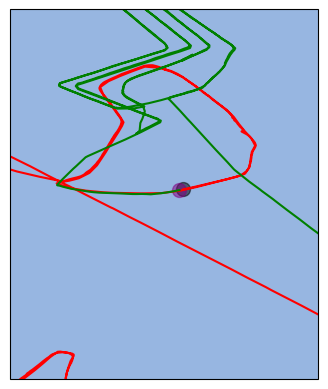

In [117]:
fig, ax = plt.subplots(1, 1, subplot_kw={'projection': cartopy.crs.PlateCarree()})

df = df_jan[df_jan.shipid == segments_id.loc['2019-01', 'segment_id']].dropna()
df.sort_values('date_time_utc', inplace=True)
ax.scatter(df.iloc[[-1]]['longitude'], df.iloc[[-1]]['latitude'], c='black', s=100, alpha=0.5)
ax.plot(df['longitude'], df['latitude'], c='red')

df.last

df = df_feb[df_feb.shipid == segments_id.loc['2019-02', 'segment_id']].dropna()
df.sort_values('date_time_utc', inplace=True)
ax.scatter(df.iloc[[0]]['longitude'], df.iloc[[0]]['latitude'], c='purple', s=100, alpha=0.5)
ax.plot(df['longitude'], df['latitude'], c='green')

ax.add_feature(cartopy.feature.COASTLINE)
ax.add_feature(cartopy.feature.LAKES)
ax.add_feature(cartopy.feature.OCEAN)
ax.add_feature(cartopy.feature.LAND)

ax.set_xlim(-24.7, -24.2)
ax.set_ylim(64.7, 65.3)

fig.show()

In [123]:
import plotly.express as px

In [136]:
df = pd.concat([
    df_jan[df_jan.shipid == segments_id.loc['2019-01', 'segment_id']].dropna().sort_values('date_time_utc'),
    df_feb[df_feb.shipid == segments_id.loc['2019-02', 'segment_id']].dropna().sort_values('date_time_utc'),
])

df['shipid'] = df['shipid'].astype(str)

fig = px.scatter_mapbox(
    df, lat='latitude', lon='longitude', hover_name='date_time_utc',
    height=600, mapbox_style='open-street-map', color='shipid',
)

fig.show()